# K-Nearest Neighbors (K-NN)
El algoritmo (k-NN) es una forma de aprendizaje automático supervisado que se utiliza para predecir categorías, sklearn.neighbors proporciona funcionalidad para los métodos de aprendizaje basados en vecinos supervisados y sin supervisión. El aprendizaje supervisado basado en vecinos se presenta en dos tipos: 

* Clasificación para datos con etiquetas discretas
* Regresión para datos con etiquetas continúas.


## Paso 1
Primero debemos importar las librerías a utilizar:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

## Paso 2
De datasets importamos el conjunto de datos de `iris()` y establecemos el número de vecino más cercano en `15`


In [2]:
iris = datasets.load_iris()  # Creamos la variable para traer nuestro dataset
n_neighbors = 15

La librería Iris se encuentra separada en: 
    
* `data` que contiene todas las características.
* `target` que contiene las clases asociadas a esas características. 


In [3]:
X = iris.data[:,:2] # solo tomaremos los primeros 2 features, para ejemplificar.
print(X)
y = iris.target
print(y)


[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

## Paso 4

Para analizar los datos visualmente crearemos un mapa de colores mediante `ListedColormap` a partir de una lista de colores, y utilizaremos un mallado con un paso de 0.2 


In [4]:
h = .02  
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


## Paso 5

Ahora realizaremos dos clasificaciones, una para un peso uniforme y otra para un peso en función al inverso de la distancia.


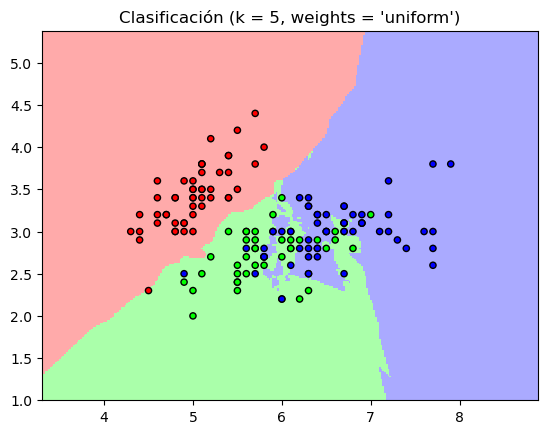

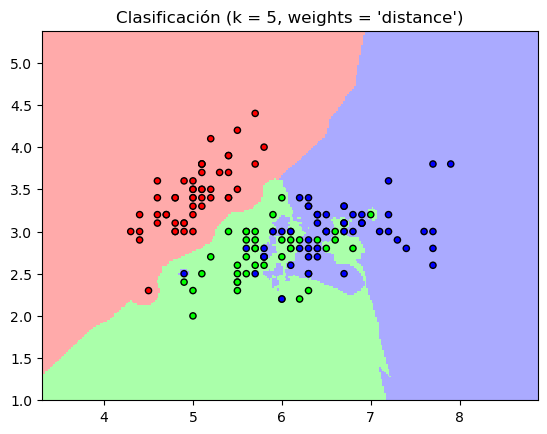

In [5]:
 n_neighbors = 5
for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador de vecinos más cercanos y le pasamos los datos mediante fit().
    # El primer párametro de KNeighborsClassifier es con cuantos vecinos quiero clasificar y el 
    # segundo el tipo de peso a utilizar.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Agregamos el resultado al gráfico
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

    # Ploteo los datos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()



In [6]:
#Ploteo un nuevo dato  
Xn = np.array([[7.3,3], [5.1,2.9], [6.4,3.2]])
Yn = clf.predict(Xn)
print(Yn)


[2 0 1]


Basado en el ejercicio [Algoritmo vecinos mas cercanos (KNN)](https://www.kaggle.com/code/alexbonella/algoritmo-vecinos-mas-cercanos-knn)

# Arboles de decisiones

Un árbol de decisiones se asemeja a las raíces de un árbol, en donde partimos de un conjunto de datos con determinadas características, que llamaremos raíz principal y que iremos descomponiendo por atributos, en ramas a partir de una determinada clasificación. Cada descomposición lleva asociada una condición que puede resultar verdadera o falsa y que se encuentra relacionada a una caracterización específica. 
Podríamos tener  por ejemplo el atributo “tipo de vehículo” con valores:
    
* Camionetas 
* Autos

Y el atributo “tracción”, con valores:
    
* Cuatro ruedas
* Dos ruedas


En base a estos atributos podríamos crear un árbol en el cual la primera división se realice por “tipo de vehículo” y luego por “tracción” o al revés. Esta división la realizaremos a partir de un algoritmo que optimice la forma en la cual se lleva a cabo la división en base a un análisis probabilístico.
Cuanto más profundo es el árbol, más complejas son las reglas de decisión y más se ajusta el modelo


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
iris=load_iris()

In [ ]:
X = iris.data[:,:2] # solo tomaremos los primeros 2 features, para ejemplificar.
Y = iris.target

In [ ]:
X_entrenamiento, X_test, y_entrenamiento, y_test=train_test_split(X, Y)

In [ ]:
arbol=DecisionTreeClassifier(max_depth=3)

In [ ]:
arbol.fit(X_entrenamiento, y_entrenamiento)

In [ ]:
arbol.score(X_test, y_test)

In [ ]:
arbol.score(X_entrenamiento, y_entrenamiento)

In [ ]:
# import os
# Usuarios de Windows:
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'


In [ ]:
export_graphviz(arbol, out_file='arbol1.dot', class_names=iris.target_names, 
                feature_names=iris.feature_names[:2], impurity=False, filled=True)

In [ ]:
with open('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plot_tree(arbol)

In [ ]:
caracteristica=2

plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),iris.feature_names[:2])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


In [ ]:
h = .02  
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [ ]:
# Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])

# Agregamos el resultado al gráfico
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

# Ploteo los datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision tree")
    
# #Ploteo un nuevo dato  
Xn = np.array([[7.3,3], [5.1,2.9], [6.4,3.2]])
Yn = arbol.predict(Xn)
print(Yn)
plt.show()
